### Imports

In [1]:
%load_ext autoreload
%autoreload 2

# adding relavent directory in includes
import sys
dirr = "../../src"
if dirr not in sys.path:
    sys.path.append(dirr)

from sklearn import tree
import pandas as pd
import numpy as np
import utils as helper # helper functions
from dt import DecisionTreeClassifier # my implementation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as SkDecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor as SkDecisionTreeRegression
from dt import DecisionTreeRegression

# Question 1

In [2]:
data = pd.read_csv("../../data/tennis/tennis.csv")
data.head(5)

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [3]:
# wrangling the data according to the question.
data_wrangled = data.copy()
data_wrangled.iloc[2,0] = np.NaN
data_wrangled.head(5)

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,NaN,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [4]:
# priting out the mode
data_wrangled.iloc[:, 0].mode()

0    rainy
1    sunny
dtype: object

In [5]:
# the values of outlook provided in the wrangled data
data_wrangled.iloc[:, 0].value_counts()

rainy       5
sunny       5
overcast    3
Name: outlook, dtype: int64

In [6]:
# unwrangling the data with mode.
data_unwrangled = data_wrangled.fillna(data_wrangled.iloc[:, 0].mode()[0])
data_unwrangled.head(5)

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,rainy,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [7]:
tree = DecisionTreeClassifier(method='gini', max_depth=5)
tree.train(data_unwrangled)
helper.parser(tree.root)

Question: Is 2th Column = normal
  T: Question: Is 3th Column = True
    T: Question: Is 0th Column = rainy
      T: Predict: no
      F: Predict: yes
    F: Predict: yes
  F: Question: Is 0th Column = sunny
    T: Predict: no
    F: Question: Is 3th Column = True
      T: Question: Is 0th Column = overcast
        T: Predict: yes
        F: Predict: no
      F: Predict: yes



In [8]:
originalTree = DecisionTreeClassifier(method='gini', max_depth=5)
originalTree.train(data)
helper.parser(originalTree.root)

Question: Is 0th Column = overcast
  T: Predict: yes
  F: Question: Is 2th Column = high
    T: Question: Is 0th Column = rainy
      T: Question: Is 3th Column = False
        T: Predict: yes
        F: Predict: no
      F: Predict: no
    F: Question: Is 3th Column = True
      T: Question: Is 0th Column = rainy
        T: Predict: no
        F: Predict: yes
      F: Predict: yes



---
# Question 2
### b) Usage of DT Classifier
On IRIS Dataset.

In [9]:
data_loc = "../../data/iris/"
data = pd.read_csv(data_loc + "iris.csv", header=None)
data.head(6)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


In [10]:
Rows_train, Rows_test = train_test_split(data, test_size=.3)

In [11]:
mydt = DecisionTreeClassifier(method='gini', max_depth=5)
mydt.train(Rows_train)
skdt = SkDecisionTreeClassifier(criterion='gini', max_depth=5)
skdt.fit(Rows_train.iloc[:, :-1], Rows_train.iloc[:, -1])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
my_preds = np.squeeze(mydt.predict(Rows_test.iloc[:, :-1]).values)
sk_preds = skdt.predict(Rows_test.iloc[:, :-1])

In [13]:
true = Rows_test.iloc[:, -1].values
my_acc = ((true == my_preds).sum())/Rows_test.shape[0]
sk_acc = ((true == sk_preds).sum())/Rows_test.shape[0]
print ("my_acc:", my_acc) 
print ("sk_acc:", sk_acc) 

my_acc: 0.9555555555555556
sk_acc: 0.9555555555555556


In [14]:
Rows_test.head(15)

,0,1,2,3,4
126,6.2,2.8,4.8,1.8,Iris-virginica
53,5.5,2.3,4.0,1.3,Iris-versicolor
7,5.0,3.4,1.5,0.2,Iris-setosa
93,5.0,2.3,3.3,1.0,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
90,5.5,2.6,4.4,1.2,Iris-versicolor
65,6.7,3.1,4.4,1.4,Iris-versicolor
40,5.0,3.5,1.3,0.3,Iris-setosa
147,6.5,3.0,5.2,2.0,Iris-virginica
124,6.7,3.3,5.7,2.1,Iris-virginica


In [15]:
import utils
utils.parser(mydt.root)

Question: Is 3th Column >= 1.0
  T: Question: Is 3th Column >= 1.8
    T: Question: Is 2th Column >= 4.9
      T: Predict: Iris-virginica
      F: Question: Is 0th Column >= 6.0
        T: Predict: Iris-virginica
        F: Predict: Iris-versicolor
    F: Question: Is 2th Column >= 5.0
      T: Question: Is 0th Column >= 6.7
        T: Predict: Iris-versicolor
        F: Predict: Iris-virginica
      F: Question: Is 3th Column >= 1.7
        T: Predict: Iris-virginica
        F: Predict: Iris-versicolor
  F: Predict: Iris-setosa



In [16]:
my_preds

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

### b) k Fold nested Cross Validation

In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
data_loc = "../../data/iris/"
data = pd.read_csv(data_loc + "iris.csv", header=None)
data.head(6)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


In [19]:
from sklearn.utils import shuffle

def nested_cross(dTrain, depths, num_valid):
    folds = make_folds(dTrain, num_valid)
    # holding out test
    passed_folds = folds[:-1]
    k = best_k(passed_folds, depths)
    acc = 0
    for i in range(num_valid):
        curr_fold_train = [x for j,x in enumerate(folds) if j!=i] 
        curr_fold_test = folds[i]
        curr_fold_train = pd.concat(curr_fold_train)
        mydt = DecisionTreeClassifier(method='gini', max_depth=k)
        mydt.train(curr_fold_train)
        my_preds = np.squeeze(mydt.predict(curr_fold_test.iloc[:, :-1]).values)
        true = curr_fold_test.iloc[:, -1].values
        my_acc = ((true == my_preds).sum())/curr_fold_test.shape[0]
        acc += my_acc/num_valid
    return {"depth": k, "acc": acc}   

def make_folds(dTrain, num_valid):
    '''Make a number of folds with diven pd'''
    train = shuffle(dTrain)
    last = train.shape[0]
    folds = []
    for i in range(num_valid):
        start = i*int(last/num_valid)
        end = (i+1)*int(last/num_valid)
        if end >= last:
            end = -1
        folds.append(train.iloc[start:end, :])
    return folds

def best_k(folds, depths):
    '''return depth that maximizes the avg accuracy'''
    num_valid = len(folds)
    acc = {}
    for i in range(num_valid):
        curr_fold_train = [x for j,x in enumerate(folds) if j!=i] 
        curr_fold_validation = folds[i]
        curr_fold_train = pd.concat(curr_fold_train)
        for k in depths:
            mydt = DecisionTreeClassifier(method='gini', max_depth=k)
            mydt.train(curr_fold_train)
            my_preds = np.squeeze(mydt.predict(curr_fold_validation.iloc[:, :-1]).values)
            true = curr_fold_validation.iloc[:, -1].values
            my_acc = ((true == my_preds).sum())/curr_fold_validation.shape[0]
            if k in acc.keys():
                acc[k] += my_acc
            else:
                acc[k] = my_acc
    acc = {k: acc[k]/num_valid for k in acc.keys()}
    
    x = acc
    print (acc) # for showcasing
    sorted_by_value = sorted(x.items(), key=lambda kv: kv[1])
    return sorted(x[0] for x in sorted_by_value if sorted_by_value[-1][1] == x[1])[0]

In [20]:
dic = nested_cross(data, [1, 3, 5, 7, 9, 11], 4)

{1: 0.6216216216216216, 3: 0.963963963963964, 5: 0.954954954954955, 7: 0.954954954954955, 9: 0.954954954954955, 11: 0.954954954954955}


In [21]:
print ("optimal depth:", dic["depth"], "| with accuracy:", dic["acc"]) 

optimal depth: 3 | with accuracy: 0.9459459459459459


# Question 3
### Demo for Regressor

### Reading Data

In [22]:
d = pd.read_excel("../../data/real_estate/dataset.xlsx")
d.head(6)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1


### Training

In [23]:
dt = DecisionTreeRegression(max_depth=4, method='std')
dt.train(d)

### Prediction

In [24]:
# passing sample test cases from the data
# the argument passed should be a pd DF
dt.predict(d.iloc[4:7, :-1])

,0
4,48.716327
5,26.465432
6,39.378302


# Question 4
### Performance Difference
w.r.t. the time taken as well as the accuracy of the two regressors (sklearn's and my implementation)

In [25]:
d = pd.read_excel("../../data/real_estate/dataset.xlsx")
d.head(6)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1


In [26]:
dTrain, dTest = train_test_split(d, test_size=.3)

### Time Required: train()
Training my DT Regressor

In [27]:
dt = DecisionTreeRegression(max_depth=3, method='std')
%time dt.train(dTrain)

CPU times: user 7.75 s, sys: 0 ns, total: 7.75 s
Wall time: 7.75 s


Training sk DT

In [28]:
skdt = SkDecisionTreeRegression(max_depth=3, criterion='mse')
%time skdt.fit(dTrain.iloc[:, :-1], dTrain.iloc[:, -1])

CPU times: user 1.99 ms, sys: 0 ns, total: 1.99 ms
Wall time: 1.6 ms


DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Time Required: predict()

In [29]:
# passing sample test cases from the data
# the argument passed should be a pd DF
%time my_pred = dt.predict(dTest.iloc[:, :-1])

CPU times: user 593 ms, sys: 7.98 ms, total: 601 ms
Wall time: 596 ms


In [30]:
# passing sample test cases from the data
# the argument passed should be a pd DF
%time sk_pred = skdt.predict(dTest.iloc[:, :-1])

CPU times: user 1.08 ms, sys: 4 µs, total: 1.09 ms
Wall time: 1.01 ms


In [31]:
from sklearn.metrics import mean_squared_error as mse

In [32]:
y_actual = dTest.iloc[:, -1]
my_mse = mse(y_actual, my_pred)
sk_mse = mse(y_actual, sk_pred)

In [33]:
print("my_mse: ", my_mse)
print("sk_mse: ", sk_mse)

my_mse:  67.81810246286759
sk_mse:  76.68921186585202


---

# Question 5
### Visualizing the DT

In [34]:
d = pd.read_excel("../../data/real_estate/dataset.xlsx")
d.head(6)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1


### Training

In [35]:
dt = DecisionTreeRegression(max_depth=4, method='std')
dt.train(d)

Printing the whole DT learnt for visualization

## Parse / Visualization

In [36]:
helper.parser(dt.root)

Question: Is 3th Column >= 995.7554
  T: Question: Is 6th Column >= 121.50827
    T: Question: Is 5th Column >= 24.98407
      T: Question: Is 2th Column >= 12.5
        T: Predict: 31.466666666666665
        F: Predict: 42.36666666666667
      F: Question: Is 2th Column >= 30.3
        T: Predict: 18.900000000000002
        F: Predict: 26.465432098765437
    F: Question: Is 1th Column >= 2013.5
      T: Question: Is 2th Column >= 23.0
        T: Predict: 22.700000000000003
        F: Predict: 17.44
      F: Question: Is 2th Column >= 16.0
        T: Predict: 14.886666666666665
        F: Predict: 17.1125
  F: Question: Is 2th Column >= 11.8
    T: Question: Is 3th Column >= 333.3679
      T: Question: Is 5th Column >= 24.96412
        T: Predict: 39.37830188679246
        F: Predict: 30.00833333333333
      F: Question: Is 2th Column >= 35.4
        T: Predict: 56.55
        F: Predict: 44.156363636363636
    F: Question: Is 6th Column >= 121.53059
      T: Question: Is 6th Column >= 

### Prediction

In [37]:
# passing sample test cases from the data
# the argument passed should be a pd DF
dt.predict(d.iloc[4:7, :-1])

,0
4,48.716327
5,26.465432
6,39.378302


---
# Question 7
### Complexity Analysis

In [38]:
%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import time

In [39]:
def create_data(N, M):
    temp = np.random.random((N, M)) >= 0.5
    return pd.DataFrame(temp)

In [40]:
N = 10
M = 10
data = create_data(N, M)
data.head(6)

,0,1,2,3,4,5,6,7,8,9
0,True,False,False,False,False,False,False,True,True,False
1,True,True,False,False,False,True,True,False,False,False
2,True,False,False,False,False,True,False,False,True,False
3,False,False,False,True,False,True,True,True,False,False
4,True,True,False,False,False,False,False,False,True,False
5,True,False,True,False,True,False,False,False,False,True


In [41]:
def timer(data, max_depth):
    dt = DecisionTreeClassifier(method = 'gini', max_depth = max_depth)
    dTrain, dTest = train_test_split(data, test_size=.3)
    start = time.time()
    dt.train(dTrain)
    end = time.time()
    train = end-start
    start = time.time()
    dt.predict(dTest.iloc[:, :-1])
    end = time.time()
    test = end-start
    return train, test

In [42]:
def foo(N, M, max_depth = 5):
    TRAIN = []
    TEST = []
    N_ = []
    M_ = []
    for n in N:
        for m in M:
            data = create_data(n, m)
            train, test = timer(data, max_depth)
            N_.append(n)
            M_.append(m)
            TRAIN.append(train)            
            TEST.append(test)
    return TRAIN, TEST, N_, M_

In [43]:
t = 5
N = [30 * i for i in range(1, t + 1)]
M = [6 * i for i in range(1, t + 1)]

In [44]:
tr, te, ns, ms = foo(N, M)

In [45]:
def plotter(z, x, y):
    ax = plt.axes(projection='3d')
    ax.set_xlabel('# of Samples')
    ax.set_ylabel('# of Features')
    ax.set_zlabel('time')
    ax.scatter3D(x, y, z, c=z, cmap='Greens')
    return ax

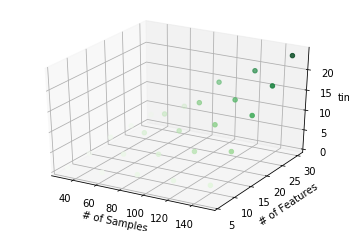

In [46]:
plotter(tr, ns, ms)

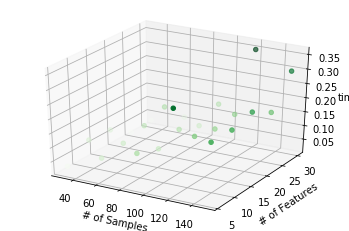

In [47]:
plotter(te, ns, ms)

### Training time
with # of samples, and wrt # of features.

In [48]:
def plotter2d(y, x, t, norm, off = 0):
    end = int(len(y)/t)
    if norm == 'n':
        y = [y[i*t + off] for i in range(end)]
        x = [x[i*t + off] for i in range(end)]
        color = 'green'
    else:
        y = [y[i + end*off] for i in range(end)]
        x = [x[i + end*off] for i in range(end)]
        color = 'orange'
    plt.plot(x, y, 'o', color=color)

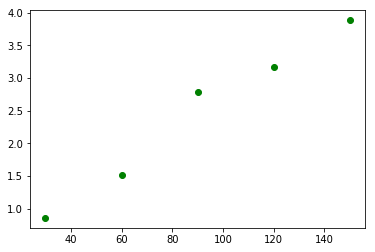

In [49]:
plotter2d(tr, ns, t, 'n') # time wrt # of samples

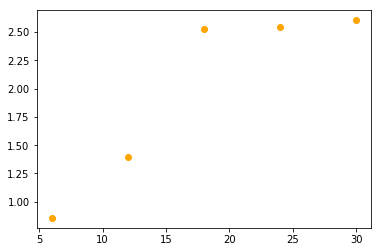

In [50]:
plotter2d(tr, ms, t, 'm') # time wrt # of features

### Testing time
with # of samples, and wrt # of features.

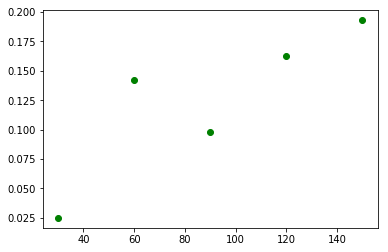

In [51]:
plotter2d(te, ns, t, 'n', off=3) # time wrt # of samples

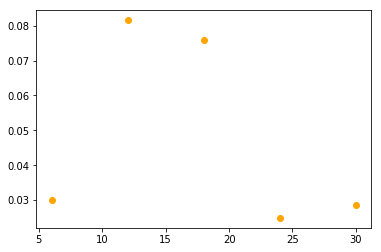

In [52]:
plotter2d(te, ms, t, 'm') # time wrt # of features